In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

# Препроцессинг

## Мердж данных

In [2]:
def read_table(tablename):
    return pd.read_csv(f"dump/{tablename}_202403271617.csv")

def join_by(df1, df2, key1, key2):
    return df1.set_index(key1).join(df2.set_index(key2))

Считывание данных

In [139]:
tasks_df = read_table("tasks")
transitions_df = read_table("task_transitions")
users_df = read_table("users")
service_object_task_df = read_table("service_object_task")
service_objects_df = read_table("service_objects")
accounts_df = read_table("accounts")
division_service_object_df = read_table("division_service_object")
places_df = read_table("places")

Берём нужные фичи

In [140]:
tasks_df = tasks_df[["id", "account_id", "taskable_type", "created_at", "deadline_at", "assigner_id"]]
transitions_df = transitions_df[["id", "task_id", "task_stage_id", "transitioned_at"]]
service_objects_df = service_objects_df[["id", "object_type_id", "place_id"]]

Делаем таблицу со всеми данными

In [141]:
transitions_df["transition_id"] = transitions_df["id"]
transitions_df = transitions_df.drop("id", axis=1)

service_objects_df["service_objects_id"] = service_objects_df["id"]
service_objects_df = service_objects_df.drop("id", axis=1)

places_df = places_df[["region_id", "district_id", "id", "location"]]
places_df["place_id"] = places_df["id"]
places_df = places_df.drop("id", axis=1)

In [145]:
transitions_df["task_id"] = transitions_df["task_id"].astype('int')

In [149]:
transitions_df = transitions_df.drop_duplicates(subset=["task_id"], keep="last")

In [150]:
task_transitions_df = tasks_df.set_index("id").join(transitions_df.set_index("task_id"))
task_transitions_df["task_id"] = task_transitions_df.index

task_transitions_df = task_transitions_df.set_index("task_id")

In [17]:
taskable_type_to_id = {'App\\Models\\ServiceDesk\\Incident': 1,
                       'App\\Models\\ServiceDesk\\Regular': 2,
                       'App\\Models\\ServiceDesk\\Assignment': 3,
                       'App\\Models\\ServiceDesk\\Reclamation': 4}

In [151]:
task_transitions_df["taskable_type"] = task_transitions_df["taskable_type"].apply(lambda x: taskable_type_to_id[x])

task_transitions_df = task_transitions_df.join(service_object_task_df.set_index("task_id"))

In [152]:
task_transitions_df["service_objects_id_copy"] = task_transitions_df["service_object_id"]
task_transitions_df["task_id"] = task_transitions_df.index
task_transitions_df = task_transitions_df.set_index("service_objects_id_copy").join(service_objects_df.set_index("service_objects_id")).set_index("task_id")

In [153]:
task_transitions_df["task_id"] = task_transitions_df.index
task_transitions_df["place_id_copy"] = task_transitions_df["place_id"]
task_transitions_df = task_transitions_df.set_index("place_id_copy").join(places_df.set_index("place_id")).set_index("task_id")

In [155]:
task_transitions_df["task_id"] = task_transitions_df.index
task_transitions_df["service_object_id_copy"] = task_transitions_df["service_object_id"]
task_transitions_df = task_transitions_df.set_index("service_object_id_copy").join(division_service_object_df.set_index("service_object_id")).set_index("task_id")

In [159]:
task_transitions_df

,account_id,taskable_type,created_at,deadline_at,assigner_id,task_stage_id,transitioned_at,transition_id,service_object_id,object_type_id,place_id,region_id,district_id,location,division_id
task_id,,,,,,,,,,,,,,,
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,5.0,2021-07-27 09:53:04,7.0,7.0,1.0,5.0,1.0,2.0,POINT (40.08500228131144 43.62972674847447),53.0
2,1,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5.0,2021-08-02 07:00:18,11.0,7.0,1.0,5.0,1.0,2.0,POINT (40.08500228131144 43.62972674847447),53.0
2,1,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5.0,2021-08-02 07:00:18,11.0,8.0,2.0,5.0,1.0,2.0,POINT (40.08500228131144 43.62972674847447),53.0
3,1,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5.0,2021-08-02 07:00:10,15.0,12.0,1.0,7.0,1.0,2.0,POINT (40.224 43.683),53.0
3,1,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5.0,2021-08-02 07:00:10,15.0,13.0,2.0,7.0,1.0,2.0,POINT (40.224 43.683),53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72667,2,1,2024-03-25 14:26:42,2024-03-30 21:00:00,210,21.0,2024-03-25 17:29:24,288414.0,4926.0,9.0,2657.0,5.0,133.0,POINT (42.794095 44.390624),75.0
72668,2,1,2024-03-25 14:27:04,2024-03-30 21:00:00,210,21.0,2024-03-25 17:29:21,288413.0,4926.0,9.0,2657.0,5.0,133.0,POINT (42.794095 44.390624),75.0
72669,2,1,2024-03-25 14:27:38,2024-04-09 21:00:00,210,17.0,2024-03-25 17:28:27,288409.0,5060.0,9.0,2731.0,42.0,NaN,POINT (44.631341666667 42.759205555556),75.0


In [156]:
task_transitions_df.to_csv("merged_df.csv")

## Изменение типов

In [172]:
merged_df = pd.read_csv("merged_df.csv")
merged_df = merged_df.set_index("task_id")

In [173]:
merged_df = merged_df.dropna()
merged_df

,account_id,taskable_type,created_at,deadline_at,assigner_id,task_stage_id,transitioned_at,transition_id,service_object_id,object_type_id,place_id,region_id,district_id,location,division_id
task_id,,,,,,,,,,,,,,,
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,5.0,2021-07-27 09:53:04,7.0,7.0,1.0,5.0,1.0,2.0,POINT (40.08500228131144 43.62972674847447),53.0
2,1,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5.0,2021-08-02 07:00:18,11.0,7.0,1.0,5.0,1.0,2.0,POINT (40.08500228131144 43.62972674847447),53.0
2,1,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5.0,2021-08-02 07:00:18,11.0,8.0,2.0,5.0,1.0,2.0,POINT (40.08500228131144 43.62972674847447),53.0
3,1,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5.0,2021-08-02 07:00:10,15.0,12.0,1.0,7.0,1.0,2.0,POINT (40.224 43.683),53.0
3,1,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5.0,2021-08-02 07:00:10,15.0,13.0,2.0,7.0,1.0,2.0,POINT (40.224 43.683),53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72662,1,1,2024-03-25 13:00:07,2024-04-04 21:00:00,3,1.0,2024-03-25 16:00:07,288394.0,8244.0,5.0,4491.0,1.0,18.0,POINT (40.86622150688094 44.285919307861406),52.0
72663,1,1,2024-03-25 13:01:11,2024-04-04 21:00:00,3,1.0,2024-03-25 16:01:11,288395.0,1916.0,5.0,1223.0,1.0,18.0,POINT (40.75392904 44.39224453),52.0
72666,2,1,2024-03-25 14:26:11,2024-03-30 21:00:00,210,21.0,2024-03-25 17:29:26,288415.0,4926.0,9.0,2657.0,5.0,133.0,POINT (42.794095 44.390624),75.0


In [174]:
merged_df["task_stage_id"] = merged_df["task_stage_id"].astype('int')
merged_df["transition_id"] = merged_df["transition_id"].astype('int')
merged_df["service_object_id"] = merged_df["service_object_id"].astype('int')
merged_df["object_type_id"] = merged_df["object_type_id"].astype('int')
merged_df["place_id"] = merged_df["place_id"].astype('int')
merged_df["region_id"] = merged_df["region_id"].astype('int')
merged_df["district_id"] = merged_df["district_id"].astype('int')
merged_df["division_id"] = merged_df["division_id"].astype('int')

In [175]:
merged_df["task_id"] = merged_df.index

In [176]:
dataformat = "%Y-%m-%d %H:%M:%S"
str_date = "2021-07-19 02:52:49"

to_dt = lambda x: datetime.datetime.strptime(x, dataformat)

merged_df["created_at"] = merged_df["created_at"].apply(to_dt)
merged_df["deadline_at"] = merged_df["deadline_at"].apply(to_dt)
merged_df["ended_at"] = merged_df["transitioned_at"].apply(to_dt)
merged_df = merged_df.drop(columns=["transitioned_at"], axis=1)

изменяем данные о локации

In [189]:
import re
pattern = r'\d+\.\d+'

In [185]:
location_x = []
location_y = []
for task_id, values in merged_df.iterrows():
    numbers = re.findall(pattern, values.location)
    location_x.append(numbers[0])
    location_y.append(numbers[1])

In [186]:
merged_df["location_x"] = location_x
merged_df["location_y"] = location_y

In [188]:
merged_df.drop(inplace=True, columns=["location"], axis=1)

In [190]:
merged_df.to_csv("preprocessed_df.csv")

# Оценки

In [ ]:
preprocessed_df["deadline_at"]

In [102]:
d_1 = preprocessed_df["created_at"]
d_2 = preprocessed_df[["task_id","transitioned_at"]]
d_3 = preprocessed_df["deadline_at"]

In [124]:
finished_at = []
for i in d_2["task_id"].unique().tolist():
    finished_at.append(d_2[d_2["task_id"] == i].iloc[-1]["transitioned_at"])

'2021-07-27 09:53:04'

In [129]:
# for i in d_2["task_id"].unique().tolist():
#     pass

SyntaxError: incomplete input (1439054765.py, line 1)

In [130]:
# d_2["finished_at"] = finished_at

## Своевременность

In [80]:
def metric_1(df):
    D = df["deadline_at"]
    # E = df[]

In [ ]:
preprocessed_df["deadline_at"]

In [96]:
preprocessed_df["deadline_at"]

0         2021-07-19 21:00:00
1         2021-07-19 21:00:00
2         2021-07-19 21:00:00
3         2021-07-19 21:00:00
4         2021-07-19 21:00:00
                 ...         
291608    2024-03-30 21:00:00
291609    2024-03-30 21:00:00
291610    2024-03-24 21:00:00
291611    2024-03-24 21:00:00
291612    2024-03-24 21:00:00
Name: deadline_at, Length: 291613, dtype: object

In [81]:
metric_1(preprocessed_df)

account_id                             1
taskable_type                          1
created_at           2021-07-19 02:52:49
deadline_at          2021-07-19 21:00:00
assigner_id                            3
task_stage_id                          2
transitioned_at      2021-07-20 18:20:37
transition_id                          2
service_object_id                      7
object_type_id                         1
place_id                               5
region_id                              1
district_id                            2
Name: 1, dtype: object


## Регулярность

## Скорость

# Вероятность инцидента

In [64]:
df = pd.read_csv("preprocessed_df.csv")
df = df.set_index("task_id")
df.drop(columns=["task_id.1"], axis=1, inplace=True)

In [65]:
taskable_type_to_id

{'App\\Models\\ServiceDesk\\Incident': 1,
 'App\\Models\\ServiceDesk\\Regular': 2,
 'App\\Models\\ServiceDesk\\Assignment': 3,
 'App\\Models\\ServiceDesk\\Reclamation': 4}

### Создание целевой переменной

In [66]:
df["is_incident"] = df["taskable_type"].apply(lambda x: 0 if x != 1 else 1)
df["is_regular"] = df["taskable_type"].apply(lambda x: 0 if x != 2 else 1)
df.drop(columns=["taskable_type"], inplace=True, axis=1)

In [67]:
print(len(df[df["is_incident"] == 1]))
print(len(df[df["is_incident"] == 0]))

6652
69704


Классы несбалансированы

In [71]:
df

,account_id,created_at,deadline_at,assigner_id,task_stage_id,transition_id,service_object_id,object_type_id,place_id,region_id,district_id,division_id,ended_at,location_x,location_y,is_incident,is_regular
task_id,,,,,,,,,,,,,,,,,
1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,5,7,7,1,5,1,2,53,2021-07-27 09:53:04,40.085002,43.629727,1,0
2,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5,11,7,1,5,1,2,53,2021-08-02 07:00:18,40.085002,43.629727,1,0
2,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5,11,8,2,5,1,2,53,2021-08-02 07:00:18,40.085002,43.629727,1,0
3,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5,15,12,1,7,1,2,53,2021-08-02 07:00:10,40.224000,43.683000,1,0
3,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5,15,13,2,7,1,2,53,2021-08-02 07:00:10,40.224000,43.683000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72662,1,2024-03-25 13:00:07,2024-04-04 21:00:00,3,1,288394,8244,5,4491,1,18,52,2024-03-25 16:00:07,40.866222,44.285919,1,0
72663,1,2024-03-25 13:01:11,2024-04-04 21:00:00,3,1,288395,1916,5,1223,1,18,52,2024-03-25 16:01:11,40.753929,44.392245,1,0
72666,2,2024-03-25 14:26:11,2024-03-30 21:00:00,210,21,288415,4926,9,2657,5,133,75,2024-03-25 17:29:26,42.794095,44.390624,1,0


<Axes: >

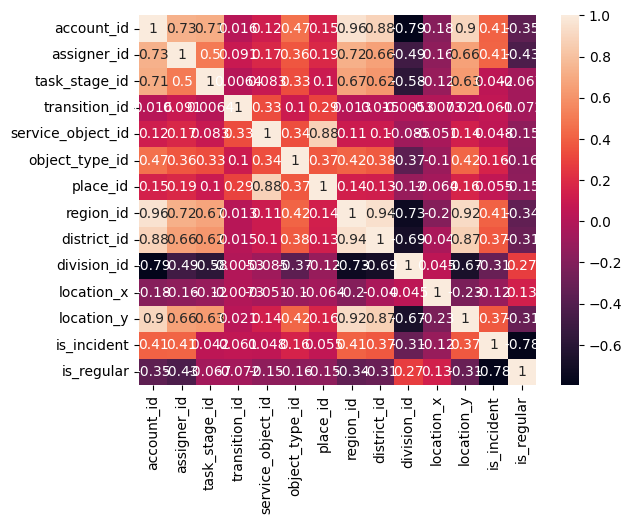

In [70]:
sns.heatmap(df.drop(columns=["created_at", "deadline_at", "ended_at"]).corr(), annot=True)

## Пробуем на одном объекте

In [72]:
df = df.set_index("service_object_id")

In [84]:
for i in df.iterrows():
    pass

,account_id,created_at,deadline_at,assigner_id,task_stage_id,transition_id,object_type_id,place_id,region_id,district_id,division_id,ended_at,location_x,location_y,is_incident,is_regular
service_object_id,,,,,,,,,,,,,,,,
7,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,5,7,1,5,1,2,53,2021-07-27 09:53:04,40.085002,43.629727,1,0
7,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5,11,1,5,1,2,53,2021-08-02 07:00:18,40.085002,43.629727,1,0
8,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5,11,2,5,1,2,53,2021-08-02 07:00:18,40.085002,43.629727,1,0
12,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5,15,1,7,1,2,53,2021-08-02 07:00:10,40.224000,43.683000,1,0
13,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5,15,2,7,1,2,53,2021-08-02 07:00:10,40.224000,43.683000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,1,2024-03-25 13:00:07,2024-04-04 21:00:00,3,1,288394,5,4491,1,18,52,2024-03-25 16:00:07,40.866222,44.285919,1,0
1916,1,2024-03-25 13:01:11,2024-04-04 21:00:00,3,1,288395,5,1223,1,18,52,2024-03-25 16:01:11,40.753929,44.392245,1,0
4926,2,2024-03-25 14:26:11,2024-03-30 21:00:00,210,21,288415,9,2657,5,133,75,2024-03-25 17:29:26,42.794095,44.390624,1,0


In [83]:
df.loc[7]

,account_id,created_at,deadline_at,assigner_id,task_stage_id,transition_id,object_type_id,place_id,region_id,district_id,division_id,ended_at,location_x,location_y,is_incident,is_regular
service_object_id,,,,,,,,,,,,,,,,
7,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,5,7,1,5,1,2,53,2021-07-27 09:53:04,40.085002,43.629727,1,0
7,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5,11,1,5,1,2,53,2021-08-02 07:00:18,40.085002,43.629727,1,0
7,1,2021-06-15 08:43:57,2021-06-17 21:00:00,4,12,3458,1,5,1,2,53,2021-06-18 05:07:26,40.085002,43.629727,0,1
7,1,2021-07-12 04:37:33,2021-07-14 21:00:00,4,12,4054,1,5,1,2,53,2021-07-14 02:57:00,40.085002,43.629727,0,1
7,1,2021-08-09 04:30:31,2021-08-12 21:00:00,4,12,4656,1,5,1,2,53,2021-08-13 03:09:17,40.085002,43.629727,0,1
7,1,2021-09-06 02:23:20,2021-09-08 21:00:00,3,12,5330,1,5,1,2,53,2021-09-13 10:08:02,40.085002,43.629727,0,1
7,1,2021-10-04 04:07:05,2021-10-13 21:00:00,4,12,5998,1,5,1,2,53,2021-10-13 04:07:12,40.085002,43.629727,0,1
7,1,2021-11-01 05:44:54,2021-11-14 21:00:00,4,12,6700,1,5,1,2,53,2021-11-11 04:31:50,40.085002,43.629727,0,1
7,1,2021-12-03 04:13:23,2021-12-09 21:00:00,30,12,7656,1,5,1,2,53,2021-12-06 07:00:16,40.085002,43.629727,0,1


In [75]:
# df["time_elapsed"] = df - df["created_at"]

,account_id,created_at,deadline_at,assigner_id,task_stage_id,transition_id,object_type_id,place_id,region_id,district_id,division_id,ended_at,location_x,location_y,is_incident,is_regular
service_object_id,,,,,,,,,,,,,,,,
7,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,5,7,1,5,1,2,53,2021-07-27 09:53:04,40.085002,43.629727,1,0
7,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5,11,1,5,1,2,53,2021-08-02 07:00:18,40.085002,43.629727,1,0
8,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5,11,2,5,1,2,53,2021-08-02 07:00:18,40.085002,43.629727,1,0
12,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5,15,1,7,1,2,53,2021-08-02 07:00:10,40.224000,43.683000,1,0
13,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5,15,2,7,1,2,53,2021-08-02 07:00:10,40.224000,43.683000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,1,2024-03-25 13:00:07,2024-04-04 21:00:00,3,1,288394,5,4491,1,18,52,2024-03-25 16:00:07,40.866222,44.285919,1,0
1916,1,2024-03-25 13:01:11,2024-04-04 21:00:00,3,1,288395,5,1223,1,18,52,2024-03-25 16:01:11,40.753929,44.392245,1,0
4926,2,2024-03-25 14:26:11,2024-03-30 21:00:00,210,21,288415,9,2657,5,133,75,2024-03-25 17:29:26,42.794095,44.390624,1,0


In [73]:
object_df = df.loc[7]

In [74]:
object_df

,account_id,created_at,deadline_at,assigner_id,task_stage_id,transition_id,object_type_id,place_id,region_id,district_id,division_id,ended_at,location_x,location_y,is_incident,is_regular
service_object_id,,,,,,,,,,,,,,,,
7,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,5,7,1,5,1,2,53,2021-07-27 09:53:04,40.085002,43.629727,1,0
7,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5,11,1,5,1,2,53,2021-08-02 07:00:18,40.085002,43.629727,1,0
7,1,2021-06-15 08:43:57,2021-06-17 21:00:00,4,12,3458,1,5,1,2,53,2021-06-18 05:07:26,40.085002,43.629727,0,1
7,1,2021-07-12 04:37:33,2021-07-14 21:00:00,4,12,4054,1,5,1,2,53,2021-07-14 02:57:00,40.085002,43.629727,0,1
7,1,2021-08-09 04:30:31,2021-08-12 21:00:00,4,12,4656,1,5,1,2,53,2021-08-13 03:09:17,40.085002,43.629727,0,1
7,1,2021-09-06 02:23:20,2021-09-08 21:00:00,3,12,5330,1,5,1,2,53,2021-09-13 10:08:02,40.085002,43.629727,0,1
7,1,2021-10-04 04:07:05,2021-10-13 21:00:00,4,12,5998,1,5,1,2,53,2021-10-13 04:07:12,40.085002,43.629727,0,1
7,1,2021-11-01 05:44:54,2021-11-14 21:00:00,4,12,6700,1,5,1,2,53,2021-11-11 04:31:50,40.085002,43.629727,0,1
7,1,2021-12-03 04:13:23,2021-12-09 21:00:00,30,12,7656,1,5,1,2,53,2021-12-06 07:00:16,40.085002,43.629727,0,1


### Feature Engineering

In [8]:
df["time_elapsed"] = 

,account_id,created_at,deadline_at,assigner_id,task_stage_id,transition_id,service_object_id,object_type_id,place_id,region_id,district_id,division_id,ended_at,location_x,location_y
task_id,,,,,,,,,,,,,,,
1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,5,7,7,1,5,1,2,53,2021-07-27 09:53:04,40.085002,43.629727
2,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5,11,7,1,5,1,2,53,2021-08-02 07:00:18,40.085002,43.629727
2,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5,11,8,2,5,1,2,53,2021-08-02 07:00:18,40.085002,43.629727
3,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5,15,12,1,7,1,2,53,2021-08-02 07:00:10,40.224000,43.683000
3,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5,15,13,2,7,1,2,53,2021-08-02 07:00:10,40.224000,43.683000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72662,1,2024-03-25 13:00:07,2024-04-04 21:00:00,3,1,288394,8244,5,4491,1,18,52,2024-03-25 16:00:07,40.866222,44.285919
72663,1,2024-03-25 13:01:11,2024-04-04 21:00:00,3,1,288395,1916,5,1223,1,18,52,2024-03-25 16:01:11,40.753929,44.392245
72666,2,2024-03-25 14:26:11,2024-03-30 21:00:00,210,21,288415,4926,9,2657,5,133,75,2024-03-25 17:29:26,42.794095,44.390624


In [193]:
df

,account_id,taskable_type,created_at,deadline_at,assigner_id,task_stage_id,transition_id,service_object_id,object_type_id,place_id,region_id,district_id,division_id,task_id.1,ended_at,location_x,location_y
task_id,,,,,,,,,,,,,,,,,
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,5,7,7,1,5,1,2,53,1,2021-07-27 09:53:04,40.085002,43.629727
2,1,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5,11,7,1,5,1,2,53,2,2021-08-02 07:00:18,40.085002,43.629727
2,1,1,2021-07-30 13:27:51,2021-07-30 21:00:00,13,5,11,8,2,5,1,2,53,2,2021-08-02 07:00:18,40.085002,43.629727
3,1,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5,15,12,1,7,1,2,53,3,2021-08-02 07:00:10,40.224000,43.683000
3,1,1,2021-07-30 13:10:50,2021-07-30 21:00:00,13,5,15,13,2,7,1,2,53,3,2021-08-02 07:00:10,40.224000,43.683000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72662,1,1,2024-03-25 13:00:07,2024-04-04 21:00:00,3,1,288394,8244,5,4491,1,18,52,72662,2024-03-25 16:00:07,40.866222,44.285919
72663,1,1,2024-03-25 13:01:11,2024-04-04 21:00:00,3,1,288395,1916,5,1223,1,18,52,72663,2024-03-25 16:01:11,40.753929,44.392245
72666,2,1,2024-03-25 14:26:11,2024-03-30 21:00:00,210,21,288415,4926,9,2657,5,133,75,72666,2024-03-25 17:29:26,42.794095,44.390624


In [45]:
wout_data = preprocessed_df.drop(columns=["created_at", "deadline_at", "transitioned_at"])

<Axes: >

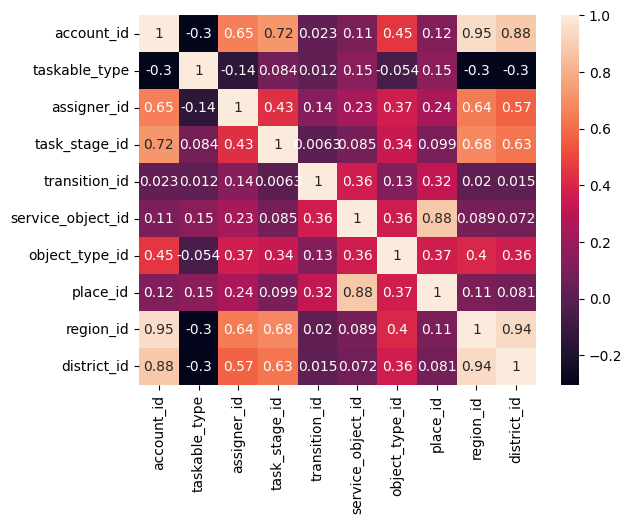

In [46]:
sns.heatmap(wout_data.corr(), annot=True)

In [ ]:
# вероятность инцидента по отсутствующей проверке
#  